In [2]:
include("Rootfinding.jl")
using ForwardDiff, .Rootfinding, LinearAlgebra, Plots

In [3]:
f(x::Real) = (x-1)^2

f (generic function with 1 method)

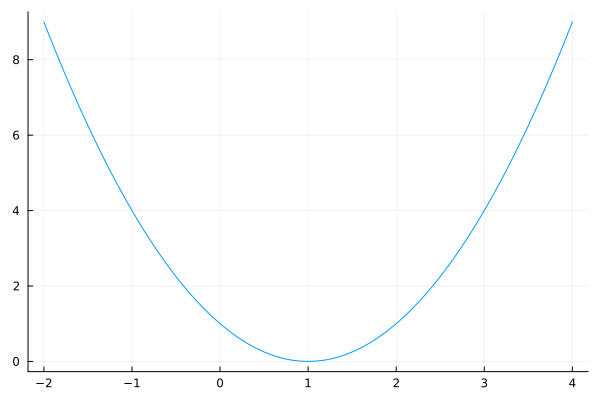

In [4]:
plot(f, -2,4, legend = false)

In [5]:
savefig("../assets/plots/optimization/xsq.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/optimization/xsq.png"

In [6]:
f(x::Real) = (x-1)^2

f (generic function with 1 method)

In [7]:
newton(x -> ForwardDiff.derivative(f,x),0)

The root is approximately x̂ = 1.0
An estimate for the error is 0.0
with f(x̂) = 0.0
which took 1 steps

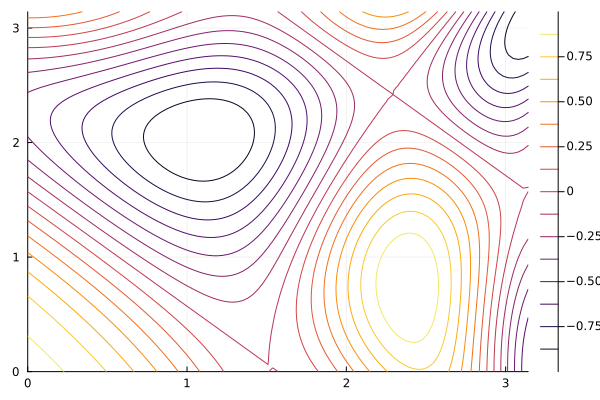

In [8]:
x = y = LinRange(0,pi,101)
g(x,y) = sin(0.5x^2-0.25y^2+2)*cos(x+y)
contour(x, y, g)

In [9]:
savefig("../assets/plots/optimization/contour.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/optimization/contour.png"

In [10]:
function gradientDescent(f::Function,x₀::Vector; γ = 0.25, max_steps = 100)
  local steps = 0
  local ∇f₀ = [1,1] # initialize it to get into while loop
  while norm(∇f₀) > 1e-8 && steps < max_steps
    ∇f₀ = ForwardDiff.gradient(f,x₀)
    x₀ = x₀ - γ*∇f₀
    steps += 1
  end
  steps < max_steps || throw(ErrorException("The number of steps has exceeded $max_steps"))
  x₀
end

gradientDescent (generic function with 1 method)

In [11]:
f(x::Vector) = sin(0.5x[1]^2-0.25x[2]^2+2)*cos(x[1]+x[2])

f (generic function with 2 methods)

In [12]:
gradientDescent(f,[0.1,0.1])

2-element Vector{Float64}:
 1.1036863833552772
 2.0379062674731965

In [13]:
function gradientDescentBB(f::Function,x₀::Vector; max_steps = 100)
  local steps = 0
  local ∇f₀ = ForwardDiff.gradient(f,x₀)
  local x₁ = x₀ - 0.25 * ∇f₀
  while norm(∇f₀) > 1e-4 && steps < max_steps
    ∇f₁ = ForwardDiff.gradient(f,x₁)
    Δ∇f = ∇f₁-∇f₀
    x₂ = x₁ - abs(dot(x₁-x₀,Δ∇f))/norm(Δ∇f)^2*∇f₁
    x₀ = x₁
    x₁ = x₂
    ∇f₀ = ∇f₁
    steps += 1
  end
  steps < max_steps || throw(ErrorException("The number of steps has exceeded $max_steps"))
  x₁
end

gradientDescentBB (generic function with 1 method)

In [14]:
gradientDescentBB(f,[0.1,0.1])

2-element Vector{Float64}:
 1.1036850670346863
 2.0379038305805874

In [15]:
pts=[(1,8), (2,7), (4,6), (5,6),  (8,4) ,(9,2), (10,1)]

7-element Vector{Tuple{Int64, Int64}}:
 (1, 8)
 (2, 7)
 (4, 6)
 (5, 6)
 (8, 4)
 (9, 2)
 (10, 1)

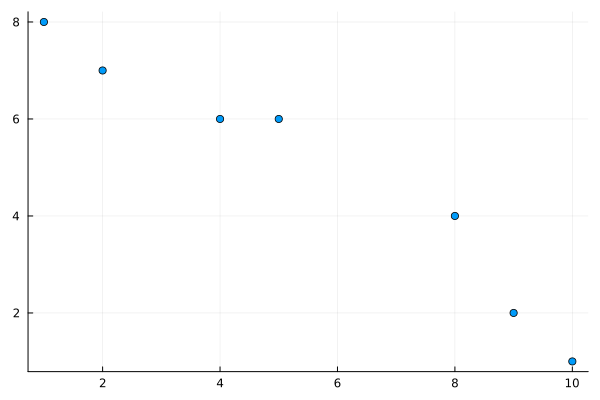

In [16]:
scatter(map(pt->pt[1],pts),map(pt->pt[2],pts),legend=false)

In [17]:
savefig("../assets/plots/optimization/scatter.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/optimization/scatter.png"

In [18]:
leastSqLine(coeffs::Vector{T}) where T <: Real = sum(pt -> (coeffs[1]*pt[1]+coeffs[2]-pt[2])^2,pts)

leastSqLine (generic function with 1 method)

In [19]:
gradientDescent(leastSqLine,[-1,10])

ErrorException: The number of steps has exceeded 100

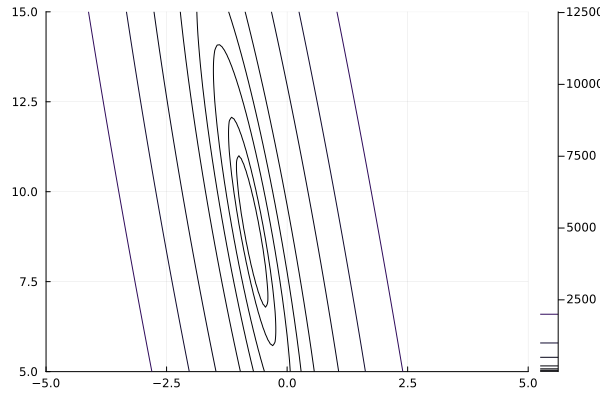

In [20]:
x = LinRange(-5,5,201)
y = LinRange(5,15,201)
contour(x,y,(x,y) -> leastSqLine([x,y]),levels=[0,10,20,50,100,200,500,1000,2000])

In [21]:
savefig("../assets/plots/optimization/contour2.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/optimization/contour2.png"

In [22]:
opt = gradientDescentBB(leastSqLine,[-1,10])

2-element Vector{Float64}:
 -0.7248062015540494
  8.89534883720881

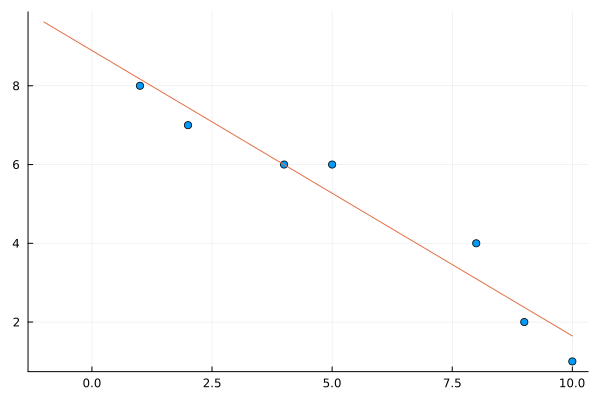

In [23]:
scatter(map(pt->pt[1],pts),map(pt->pt[2],pts),legend=false)
plot!(x->opt[1]*x+opt[2],-1,10)

In [24]:
savefig("../assets/plots/optimization/scatter2.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/optimization/scatter2.png"

In [25]:
x=LinRange(1,5,10)

10-element LinRange{Float64, Int64}:
 1.0, 1.44444, 1.88889, 2.33333, 2.77778, …, 3.66667, 4.11111, 4.55556, 5.0

In [26]:
leastSqLog(c::Vector{T}) where T <: Real = sum(xpt -> (c[1]+c[2]*xpt+c[3]*xpt^2+c[4]*xpt^3-log(xpt))^2,x)

leastSqLog (generic function with 1 method)

In [27]:
c = gradientDescentBB(leastSqLog,[-1,1,-1,1])

4-element Vector{Float64}:
 -1.0397984025249933
  1.2746659713794941
 -0.24265284063756612
  0.018798253240499104

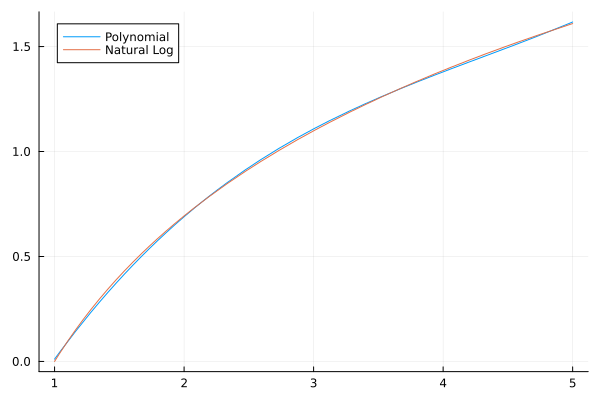

In [31]:
plot([x -> c[1]+c[2]*x+c[3]*x^2+c[4]*x^3,log],1,5, label=["Polynomial" "Natural Log"], legend = :topleft)

In [32]:
savefig("../assets/plots/optimization/log.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/optimization/log.png"

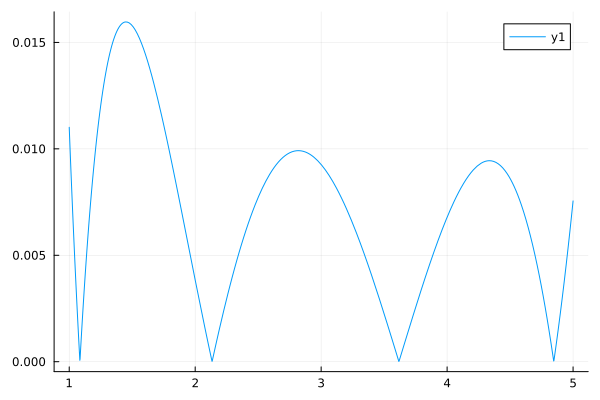

In [28]:
plot(x->(abs(c[1]+c[2]*x+c[3]*x^2+c[4]*x^3- log(x))),1,5)

In [30]:
savefig("../assets/plots/optimization/log-error.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/optimization/log-error.png"

In [34]:
using JuMP, Ipopt

In [35]:
model = Model(Ipopt.Optimizer)
@variable(model, x, start = 0.1)
@variable(model, y, start = 0.1)
@NLobjective(model, Min, sin(0.5x^2-0.25y^2+2)*cos(x+y))

In [36]:
optimize!(model)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

In [37]:
value(x),value(y)

(1.1036863858138652, 2.0379062691204775)

In [38]:
model = Model(Ipopt.Optimizer)
set_optimizer_attribute(model,"print_level",3)
@variable(model,m,start=0)
@variable(model,b,start=0)
@NLobjective(model,Min,  sum((m*pt[1]+b-pt[2])^2 for pt in pts))
optimize!(model)

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   7.8374373005015996e-01    2.1317829457364348e+00
Dual infeasibility......:   3.9184342045593763e-15    1.0658141036401503e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarit

In [39]:
value(m),value(b)

(-0.7248062015503872, 8.8953488372093)

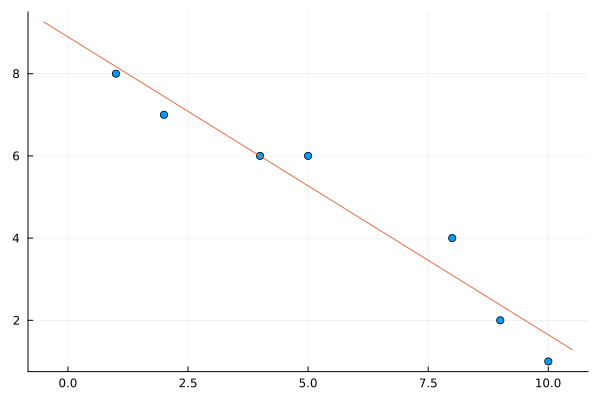

In [41]:
scatter(map(pt->pt[1],pts),map(pt->pt[2],pts),legend=false)
plot!(x->value(m)*x+value(b),-0.5,10.5)

In [42]:
savefig("../assets/plots/optimization/linregress.png")

"/Users/pstaab/code/sci-comp-book/assets/plots/optimization/linregress.png"